In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#LOADING DATA INTP PANDAS DATAFRAME FOR PREPROCESSING : 

df = pd.read_csv("user_1.csv")
df.head()   

,Date/Time,Age,Gender,Heart Rate,Anxiety Level
0,2023-09-06 10:40,20,F,68,5
1,2023-09-05 11:18,20,F,70,1
2,2023-09-04 11:18,20,F,85,3
3,2023-09-03 11:19,20,F,75,3
4,2023-09-02 11:19,20,F,77,4


In [18]:
# MAKING SURE THAT THE "Date/Time" COLUMN is in datetime format : 

df['Date/Time'] = pd.to_datetime(df['Date/Time']) 
df.head()

,Date/Time,Age,Gender,Heart Rate,Anxiety Level
0,2023-09-06 10:40:00,20,F,68,5
1,2023-09-05 11:18:00,20,F,70,1
2,2023-09-04 11:18:00,20,F,85,3
3,2023-09-03 11:19:00,20,F,75,3
4,2023-09-02 11:19:00,20,F,77,4


In [61]:
# Filtering data for a specific month (September 2023) 

start_date = '2023-09-01'
end_date = '2023-10-01'
df1 = df[(df['Date/Time'] >= start_date) & (df['Date/Time'] <= end_date)] 

# SORTING THE VALUES IN THE DATAFRAME AND RESETTING THE INDEX: 

df1 = df1.sort_values(by='Date/Time').reset_index(drop=True)
df1
df1.to_csv("updated_data1.csv") 

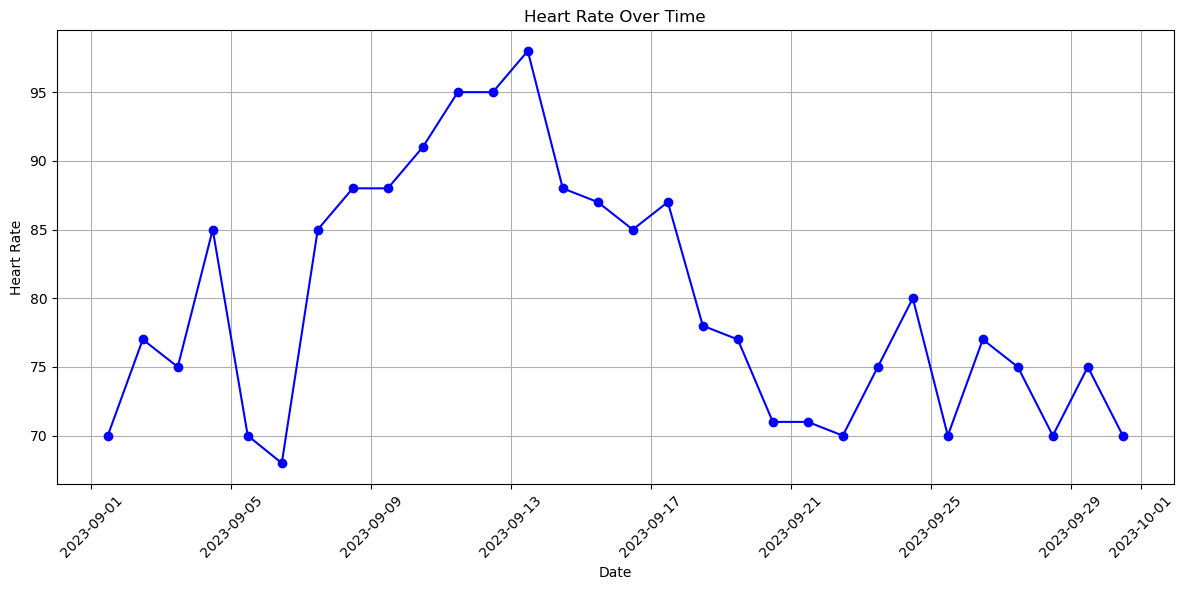

In [29]:
# CREATING A TIME SERIES PLOT FOR "heart_rate" 
plt.figure(figsize=(12, 6))
plt.plot(df1['Date/Time'], df1['Heart Rate'], marker='o', linestyle='-', color='b')
plt.title('Heart Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


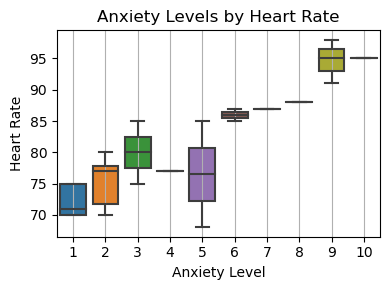

In [44]:
# Creating a box plot of anxiety levels
plt.figure(figsize=(4, 3))
sns.boxplot(data=df1, x='Anxiety Level', y='Heart Rate')
plt.title('Anxiety Levels by Heart Rate')
plt.xlabel('Anxiety Level')
plt.ylabel('Heart Rate')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

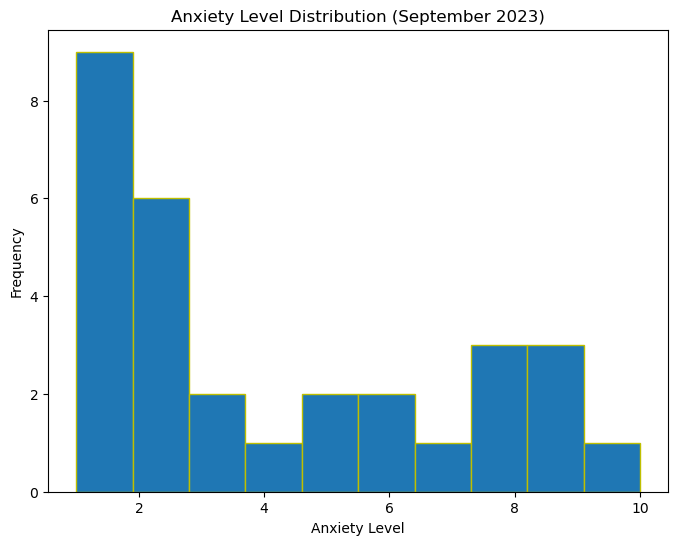

In [46]:
# Creating a histogram of anxiety levels for the month: 
plt.figure(figsize=(8, 6))
plt.hist(df1['Anxiety Level'], bins=10, edgecolor='y')
plt.title('Anxiety Level Distribution (September 2023)')
plt.xlabel('Anxiety Level')
plt.ylabel('Frequency')

In [51]:
# Display average heart rate and anxiety level for the month
print(f"Average Heart Rate (September 2023): {df1['Heart Rate'].mean():.2f}")
print(f"Average Anxiety Level (September 2023): {df1['Anxiety Level'].mean():.2f}")

Average Heart Rate (September 2023): 79.70
Average Anxiety Level (September 2023): 4.03


(-1.099999509434374,
 1.0999998578364998,
 -1.0999998809211176,
 1.0999999942110967)

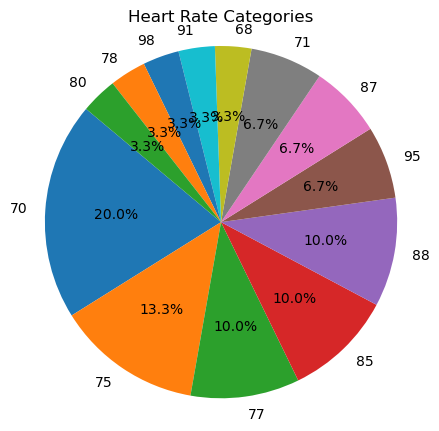

In [56]:
# Create a pie chart
category_counts = df1['Heart Rate'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Heart Rate Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


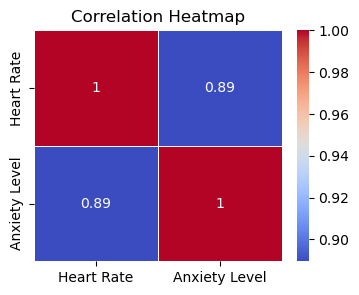

In [60]:
selected_columns = ['Heart Rate', 'Anxiety Level'] 
subset_data = df1[selected_columns] 
correlation_matrix = subset_data.corr()

# CREATING A HEATMAP TO CHECK HOW ARE ANXIETY AND HEART RATE RELATED: 
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show() 

In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Loading CSV data
data = pd.read_csv("updated_data1.csv")


# Selecting features and target variable
X = data[['Age', 'Heart Rate']].values
y = (data['Anxiety Level'] == 'High Anxiety').astype(int)  # Binary classification

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a simple neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
_, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate a classification report
report = classification_report(y_test, y_pred_binary)
print(report)


Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.6889 - accuracy: 0.2632 - val_loss: 0.6095 - val_accuracy: 0.8000
Epoch 2/50
1/1 [==============================] - 0s 33ms/step - loss: 0.6819 - accuracy: 0.2632 - val_loss: 0.6037 - val_accuracy: 0.8000
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 0.6750 - accuracy: 0.2632 - val_loss: 0.5979 - val_accuracy: 0.8000
Epoch 4/50
1/1 [==============================] - 0s 34ms/step - loss: 0.6681 - accuracy: 0.4211 - val_loss: 0.5922 - val_accuracy: 0.8000
Epoch 5/50
1/1 [==============================] - 0s 38ms/step - loss: 0.6613 - accuracy: 0.4211 - val_loss: 0.5865 - val_accuracy: 0.8000
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 0.6546 - accuracy: 0.6316 - val_loss: 0.5808 - val_accuracy: 0.8000
Epoch 7/50
1/1 [==============================] - 0s 40ms/step - loss: 0.6479 - accuracy: 0.6316 - val_loss: 0.5752 - val_accuracy: 1.0000
Epoch 8/50
1/1 [=============